<h1> <strong> Iris Project </strong> </h1>
<hr>
This is a project related to study and developed an analysis to the database <a href="https://archive.ics.uci.edu/dataset/53/iris">Iris</a>. The objetive is do a descriptive analysis, and after this, do a implementation of different statistical models and machine learning models to predict the category of the plant.

To load the database, first we install the <i> ucimlrepo </i> package. To install, we use the command
<center> <i> pip install ucimlrepo </i> </center>
After this, we load the some libraries requeried to the project.

<h2> <strong> Libraries </strong> </h2>
<hr>
<ol>
<li> <strong> Pandas </strong>: This library is implemented to the load, clean and analysis of the data.
<li> <strong> Numpy </strong>: This library is implemented to do calculus related to quantitative variables.
<li> <strong> Matplotlib.pyplot </strong>: This is used to do graphics related to the data. 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ucimlrepo
import ptitprince as pt
import seaborn as sns

from sklearn.cluster import KMeans, OPTICS, DBSCAN
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

After load the libraries to work, we load the database of iris. After load, we calculate some metrics related to the variables.

In [4]:
df = pd.DataFrame(ucimlrepo.fetch_ucirepo(id=53)["data"]["features"])
df["Category"] = pd.DataFrame(ucimlrepo.fetch_ucirepo(id=53)["data"]["targets"])
(df.
groupby("Category").
agg(
    mean_sepal_length = ("sepal length", "mean"),
    mean_sepal_width = ("sepal width", "mean"),
    mean_petal_length = ("petal length", "mean"),
    mean_petal_width = ("sepal width", "mean"),
    quantity = ("Category", "size")
).reset_index()
)

,Category,mean_sepal_length,mean_sepal_width,mean_petal_length,mean_petal_width,quantity
0,Iris-setosa,5.006,3.418,1.464,3.418,50
1,Iris-versicolor,5.936,2.770,4.260,2.770,50
2,Iris-virginica,6.588,2.974,5.552,2.974,50


Also, we can use the _.describe()_ function to obtain others metrics.

In [5]:
(df.
 groupby("Category").
 describe().
 reset_index().
 melt(id_vars=['Category'], var_name=['Metric', 'Statistic']))

,Category,Metric,Statistic,value
0,Iris-setosa,sepal length,count,50.000
1,Iris-versicolor,sepal length,count,50.000
2,Iris-virginica,sepal length,count,50.000
3,Iris-setosa,sepal length,mean,5.006
4,Iris-versicolor,sepal length,mean,5.936
...,...,...,...,...
91,Iris-versicolor,petal width,75%,1.500
92,Iris-virginica,petal width,75%,2.300
93,Iris-setosa,petal width,max,0.600
94,Iris-versicolor,petal width,max,1.800


<h2> <strong> Descriptive Analysis </h2> </strong>
<hr>

Now we create a descriptive graphics. We use the _RainCloud_ graphic to show the distribution of each of the variables, the boxplot and the dispersion graph.

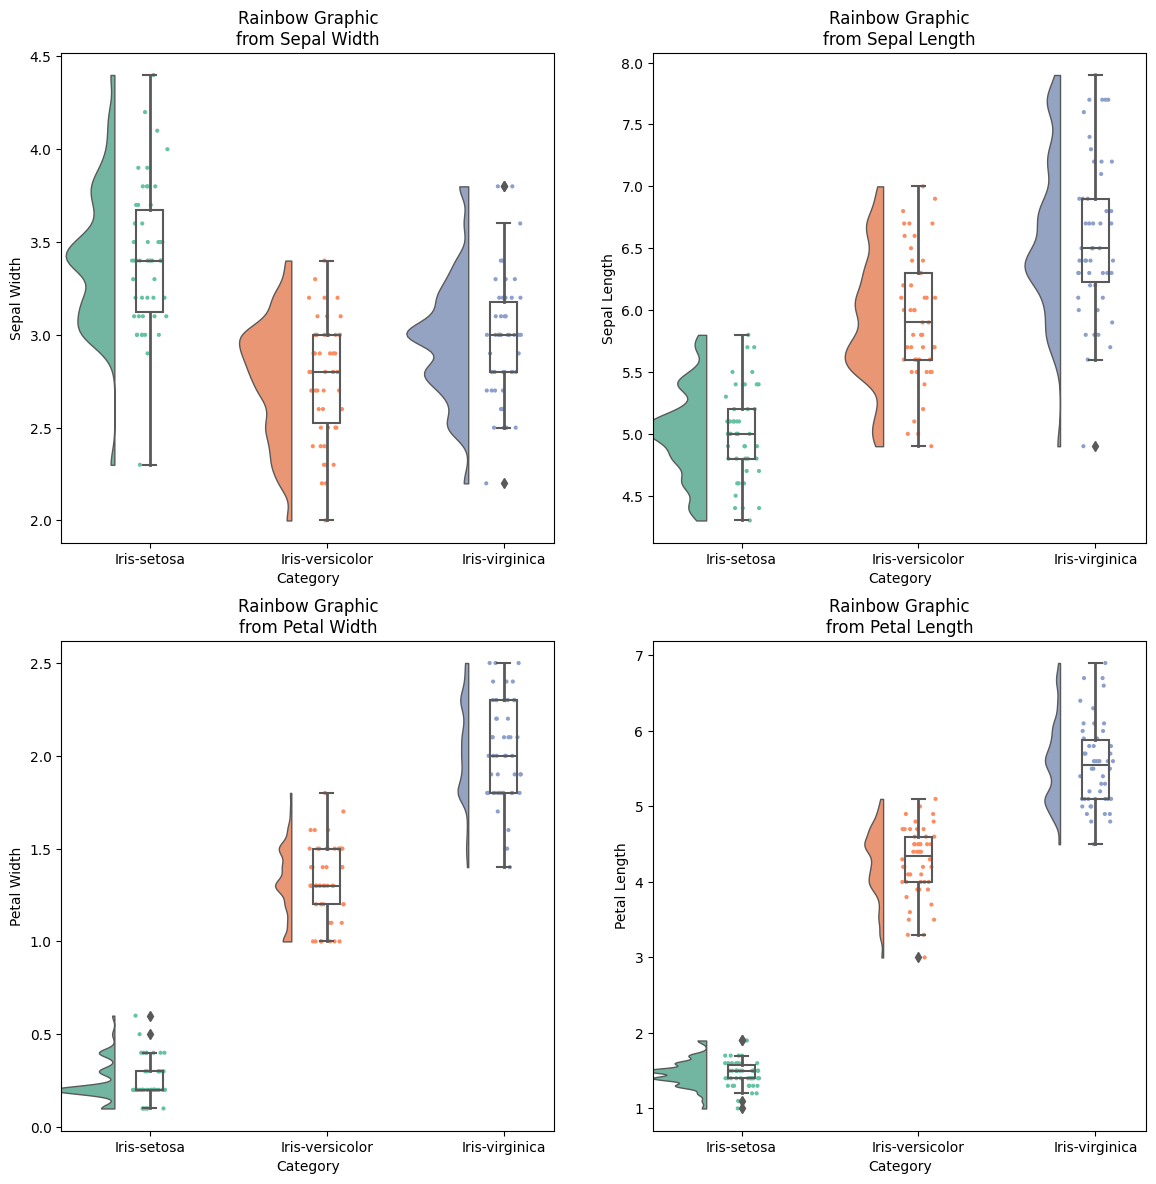

In [6]:
fig, ax = plt.subplots(2,2, figsize = (14,14))

(pt.
 RainCloud(data=df, y = 'sepal width', x = 'Category', ax = ax[0,0]).
 set_title("Rainbow Graphic\nfrom Sepal Width"))
ax[0,0].set_ylabel("Sepal Width")

(pt.
 RainCloud(data=df, y = 'sepal length', x = 'Category', ax = ax[0,1]).
 set_title("Rainbow Graphic\nfrom Sepal Length"))
ax[0,1].set_ylabel("Sepal Length")

(pt.
 RainCloud(data=df, y = 'petal width', x = 'Category', ax = ax[1,0]).
 set_title("Rainbow Graphic\nfrom Petal Width"))
ax[1,0].set_ylabel("Petal Width")

(pt.
 RainCloud(data=df, y = 'petal length', x = 'Category', ax = ax[1,1]).
 set_title("Rainbow Graphic\nfrom Petal Length"))
ax[1,1].set_ylabel("Petal Length")

plt.show()

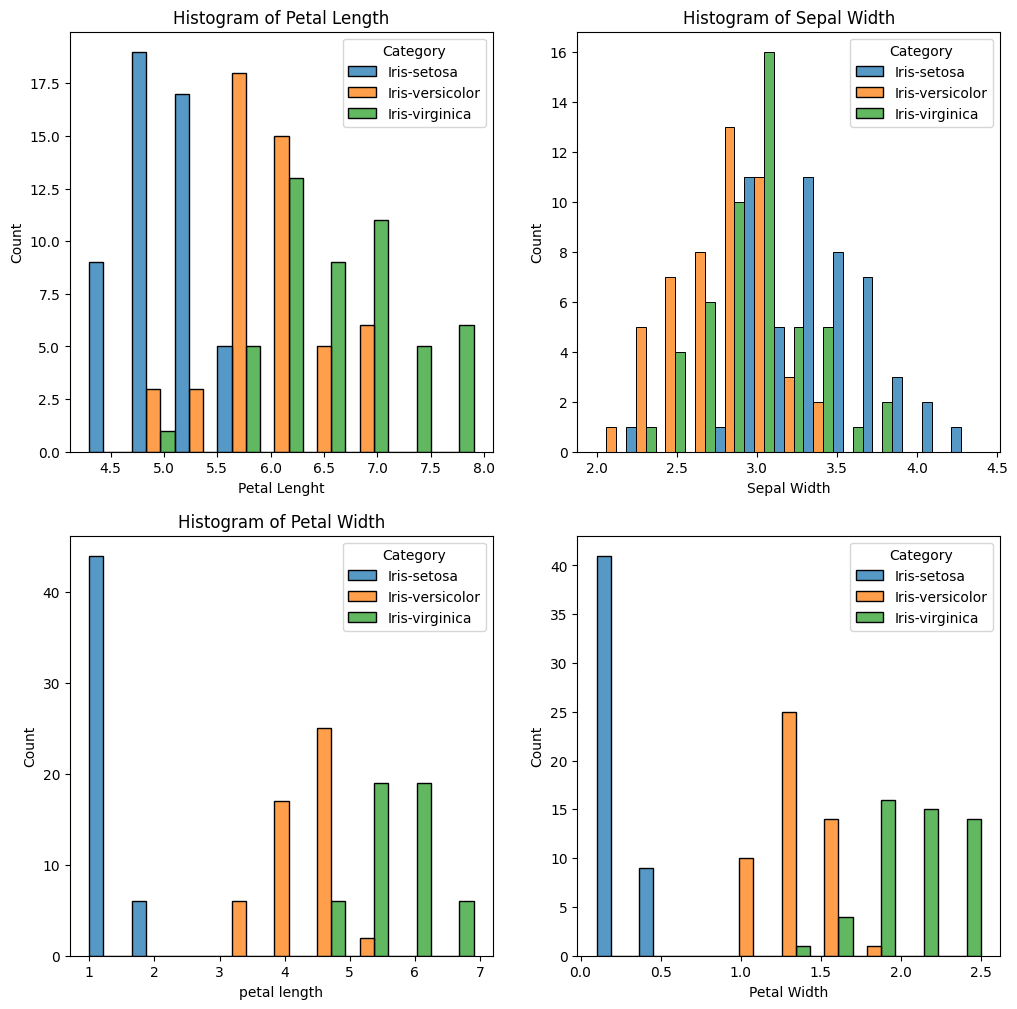

In [7]:
fig, ax = plt.subplots(2,2, figsize = (12,12))

sns.histplot(data=df, x = "sepal length", hue = "Category", multiple="dodge", ax = ax[0,0])
ax[0,0].set_title("Histogram of Sepal Length")
ax[0,0].set_xlabel("Sepal Lenght")

sns.histplot(data=df, x = "sepal width", hue = "Category", multiple="dodge", ax = ax[0,1])
ax[0,1].set_title("Histogram of Sepal Width")
ax[0,1].set_xlabel("Sepal Width")

sns.histplot(data=df, x = "petal length", hue = "Category", multiple="dodge", ax = ax[1,0])
ax[0,0].set_title("Histogram of Petal Length")
ax[0,0].set_xlabel("Petal Lenght")

sns.histplot(data=df, x = "petal width", hue = "Category", multiple="dodge", ax = ax[1,1])
ax[1,0].set_title("Histogram of Petal Width")
ax[1,1].set_xlabel("Petal Width")

plt.show()


<h2> <strong> Predictive Models </strong> </h2>
<hr>

Now we want to apply different models to predict the type of the flower, according to the characteristics. First create a subset of the data to train and test the models implemented:

In [31]:
train = df.groupby("Category").sample(frac=0.8)
test = df.drop(train.index)

Start with the models to predict the <i> Category </i>:

<h3> <strong> Logistic Regression </strong> </h3>
<hr>

The first model is the <i> Logistic Regression </i>:

In [21]:
LR = LogisticRegression().fit(train.drop('Category', axis=1), train['Category'])

The next graphic present the confusion matrix of the model:

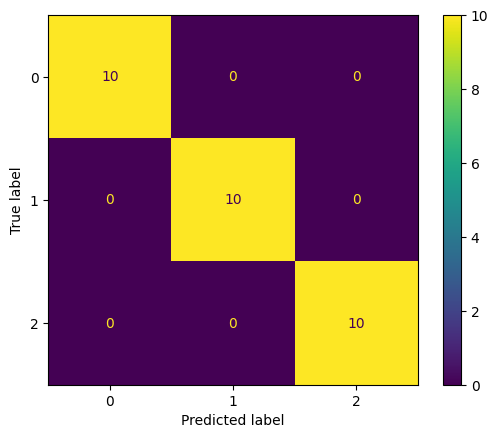

In [33]:
(metrics.
ConfusionMatrixDisplay(
    metrics.confusion_matrix(test['Category'], 
    LR.predict(test.drop("Category", axis = 1)))).plot())

plt.show()